Clasificación de los nuevos puntos:
Punto 1 [1.5 0.3] -> setosa
Punto 2 [4.5 1.5] -> versicolor
Punto 3 [5.  1.9] -> virginica
Punto 4 [6.  2.5] -> virginica
Punto 5 [5.5 2. ] -> virginica


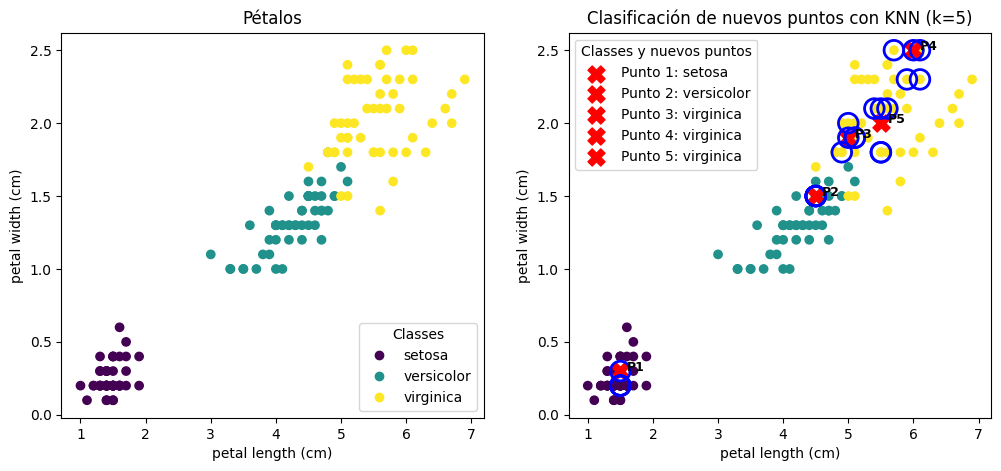

In [149]:
# Importar librerías
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Cargar el dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Usamos solo petal length y petal width
y = iris.target
target_names = iris.target_names

# Crear DataFrame
df = pd.DataFrame(X, columns=["Petal Length", "Petal Width"])
df['Target'] = y

# ==========================
# Entrenar el modelo KNN
# ==========================
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# ==========================
# Crear 5 puntos nuevos
# ==========================
nuevos_puntos = np.array([
    [1.5, 0.3],
    [4.5, 1.5],
    [5.0, 1.9],
    [6.0, 2.5],
    [5.5, 2.0]
])

# Clasificar los puntos nuevos
predicciones = knn.predict(nuevos_puntos)

# Mostrar resultados en consola
print("Clasificación de los nuevos puntos:")
for i, punto in enumerate(nuevos_puntos):
    print(f"Punto {i+1} {punto} -> {iris.target_names[predicciones[i]]}")

# ==========================
# Gráficos
# ==========================
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primera gráfica: petal length vs petal width
scatter2 = axs[0].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
axs[0].set_xlabel(iris.feature_names[2])
axs[0].set_ylabel(iris.feature_names[3])
axs[0].set_title('Pétalos')
axs[0].legend(scatter2.legend_elements()[0], iris.target_names, title="Classes", loc="lower right")

# Segunda gráfica: Clasificación de nuevos puntos con KNN
scatter2 = axs[1].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, label=None)
axs[1].set_xlabel(iris.feature_names[2])
axs[1].set_ylabel(iris.feature_names[3])
axs[1].set_title(f"Clasificación de nuevos puntos con KNN (k={k})")

# Graficar nuevos puntos y sus vecinos más cercanos
for i, punto in enumerate(nuevos_puntos):
    # Nuevo punto
    axs[1].scatter(
        punto[0], punto[1],
        color="red", marker="X", s=150,
        label=f"Punto {i+1}: {iris.target_names[predicciones[i]]}"
    )
    axs[1].text(punto[0]+0.1, punto[1], f"P{i+1}", fontsize=9, weight='bold')

    # Vecinos más cercanos
    vecinos = knn.kneighbors([punto], return_distance=False)[0]
    for idx in vecinos:
        vecino = X[idx]
        axs[1].scatter(
            vecino[0], vecino[1],
            edgecolor='blue', facecolor='none',
            s=200, linewidths=2
        )

# Leyenda final
axs[1].legend(title="Classes y nuevos puntos")

# Mostrar gráfica
plt.show()
